<a href="https://colab.research.google.com/github/Gationhe/Python/blob/main/ICM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import Rbf

# Script 1

In [ ]:
# Define the needed functions

def phi(r):
  return r**3

def f(x, y):
  return 1/(20*(x**2)+1)

def u(xx, yy, i):
  r = np.sqrt((xx - x[i-1])**2 + (yy - y[i-1])**2)
  return phi(r)

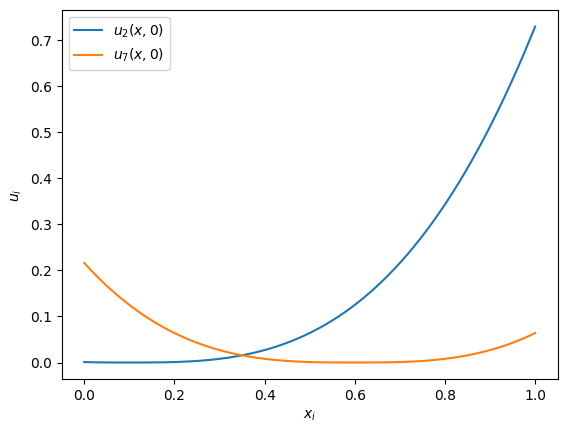

In [ ]:
n = 11
x = [i/10 for i in range(n)]
y = [0 for i in range(n)]

xx = np.linspace(0, 1, 1000)

# Plot the basis functions u_2(x, 0) and u_7(x, 0)

plt.plot(xx, u(xx, 0, 2), label = '$u_2(x, 0)$')
plt.plot(xx, u(xx, 0, 7), label = '$u_7(x, 0)$')
plt.xlabel("$x_i$")
plt.ylabel("$u_i$")
plt.legend()
plt.show()

In [ ]:
# Create and solve the linear system

A = np.zeros((n, n))

for i in range(n):
  for j in range(n):
    A[i, j] = u(x[i], y[i], j)

z = [f(x[i], y[i]) for i in range(n)]

c = np.linalg.solve(A, z)

print(f"The elements of c = {c}")

The elements of c = [  4.76158814 -15.87097175  44.71845038 -36.27817606   5.15615861
  -0.21947425   1.14179258   0.42711357  -0.23560375   1.86620472
  -6.51703216]


In [ ]:
# Evaluate the values if s(x, 0) and f(x, 0) - s(x, 0)

def s(x, y):

  ss = 0

  for i in range(n):
    s = c[i]*u(x, y, i)
    ss += s
  return ss

In [ ]:
for i in range(3):
  j = 0.25*(i+1)
  print(f"s({j}, 0) = {s(j, 0)}")
  print(f"f({j}, 0) - s({j}, 0) = {f(j, 0) - s(j, 0)}")

s(0.25, 0) = 0.442538319247459
f(0.25, 0) - s(0.25, 0) = 0.0019061251969854087
s(0.5, 0) = 0.16666666666666702
f(0.5, 0) - s(0.5, 0) = -3.608224830031759e-16
s(0.75, 0) = 0.08179235586986713
f(0.75, 0) - s(0.75, 0) = -0.00015970280864265052


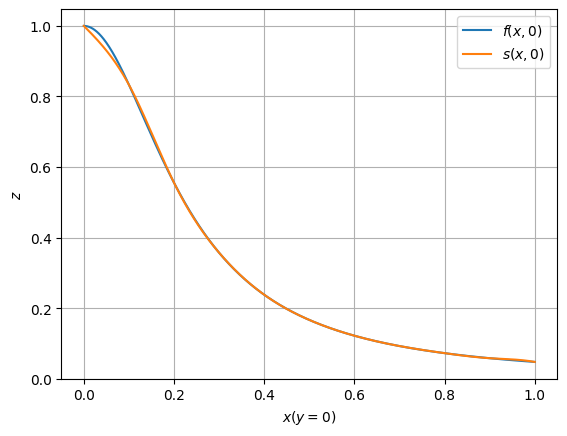

In [ ]:
plt.plot(xx, f(xx, 0), label = "$f(x, 0)$")
plt.plot(xx, s(xx, 0), label = "$s(x, 0)$")
plt.xlabel("$x (y = 0)$")
plt.ylabel("$z$")
plt.legend()
plt.grid()
plt.show()

# Script 2

In [ ]:
def f(x, y):
  return np.exp(-x**2 + 2*x*y + 2*y - y**2)

In [ ]:
# Initialize results

n_values = [100 * (k + 1) for k in range(10)]
results = []

# Iterative process for each n

for n in n_values:

  # Generate random points in U(0, 1)
  x = np.random.rand(n)
  y = np.random.rand(n)

  # Construct the linear system Ac = z to get the RBF interpolant s

  A = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      A[i, j] = u(x[i], y[i], j)

  z = [f(x[i], y[i]) for i in range(n)]
  c = np.linalg.solve(A, z)
  cond_A = np.linalg.cond(A)

  # Given nodes and values

  data_x = [0.5, 0, 1]
  data_y = [0.5, 0.6, 1]
  err_list = []

  for l in range(3):
    err = f(data_x[l], data_y[l]) - s(data_x[l], data_y[l])
    err_list.append(err)

  results.append([n, err_list[0], err_list[1], err_list[2], cond_A])

# Display results

columns = ["n", "Error at (0.5, 0.5)", "Error at (0, 0.6)", "Error at (1, 1)", "K(A)"]
table = pd.DataFrame(results, columns=columns)
print(table)

      n  Error at (0.5, 0.5)  Error at (0, 0.6)  Error at (1, 1)          K(A)
0   100         7.560408e-06           0.007290         0.079674  1.197256e+07
1   200         6.669785e-07           0.001022         0.009093  2.054946e+08
2   300         8.052751e-07           0.000165         0.012329  1.700026e+09
3   400         5.691315e-07           0.002260         0.025458  1.389673e+09
4   500        -8.842288e-08           0.001703         0.013317  1.085929e+09
5   600         6.050217e-08           0.001257         0.041418  4.961101e+09
6   700         2.385802e-09           0.000723         0.018977  1.086946e+10
7   800         3.513605e-08           0.000675         0.024230  1.733407e+10
8   900        -2.089836e-09           0.000647         0.024418  3.384645e+10
9  1000         1.298864e-08           0.000206         0.010637  3.368223e+10


Remark: when the number of nodes is increasing, generally, the errors are decreasing.

# Script 3

In [ ]:
# Revise the needed functions

def phi(r):
  return np.exp(-100*(r**2))

def u(xx, yy, i):
  r = np.sqrt((xx - x[i-1])**2 + (yy - y[i-1])**2)
  return phi(r)

In [ ]:
# Initialize results

n_values = [100 * (k + 1) for k in range(10)]
results = []

# Iterative process for each n

for n in n_values:

  # Generate random points in U(0, 1)
  x = np.random.rand(n)
  y = np.random.rand(n)

  # Construct the linear system Ac = z to get the RBF interpolant s

  A = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      A[i, j] = u(x[i], y[i], j)

  z = [f(x[i], y[i]) for i in range(n)]
  c = np.linalg.solve(A, z)
  cond_A = np.linalg.cond(A)

  # Given nodes and values

  data_x = [0.5, 0, 1]
  data_y = [0.5, 0.6, 1]
  err_list = []

  for l in range(3):
    err = f(data_x[l], data_y[l]) - s(data_x[l], data_y[l])
    err_list.append(err)

  results.append([n, err_list[0], err_list[1], err_list[2], cond_A])

# Display results

columns = ["n", "Error at (0.5, 0.5)", "Error at (0, 0.6)", "Error at (1, 1)", "K(A)"]
table = pd.DataFrame(results, columns=columns)
print(table)

      n  Error at (0.5, 0.5)  Error at (0, 0.6)  Error at (1, 1)          K(A)
0   100        -8.207815e-03           0.371180         6.170082  2.816049e+03
1   200         3.059666e-02           0.240553         1.577136  3.137155e+05
2   300         7.220620e-04           0.122391         1.048070  1.736439e+08
3   400        -7.864794e-06           0.207579         1.107314  2.529901e+09
4   500         3.844963e-04           0.024427         0.042704  6.200521e+11
5   600         1.510894e-05           0.003472         0.461739  3.079543e+13
6   700         6.236405e-06           0.001200         1.815502  2.556739e+13
7   800         2.260215e-06           0.001915         0.014098  1.642949e+15
8   900         4.081578e-07          -0.000538         1.160716  2.807269e+16
9  1000        -8.597476e-06           0.003324         0.412267  5.679828e+17


# RBF interpolation 函數建構

In [ ]:
def radial_basis_function(r, phi="gaussian"):

    if callable(phi): # If a callable radial basis function is provided, it will be used
        return phi(r)
    elif phi == "gaussian":
        return np.exp(-r**2)
    elif phi == "cubic":
        return r**3
    else:
        raise ValueError("Unsupported phi type. Provide a callable for custom RBF.")

def rbf_interpolation(x, y, f, phi="gaussian"):
    """
    Generate RBF interpolant for a given set of points and values.

    Parameters:
        x, y: Coordinates of input points.
        f: Values at input points.
        phi: The RBF shape function type ('gaussian', 'cubic', etc.).

    Returns:
        A function s(x, y) representing the interpolant.
    """
    # Construct the linear system
    n = len(x)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            r = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            A[i][j] = radial_basis_function(r, phi)

    # Solve the linear system to find coefficients
    c = np.linalg.solve(A, f)

    def s(xx, yy):
        # Compute distances from (x, y) to each input point
        r = np.sqrt((x - xx)**2 + (y - yy)**2)
        # Compute the interpolated value
        return np.sum(c * radial_basis_function(r, phi))

    return s

# Application - 等高線圖

使用 scipy.interpolate.Rbf

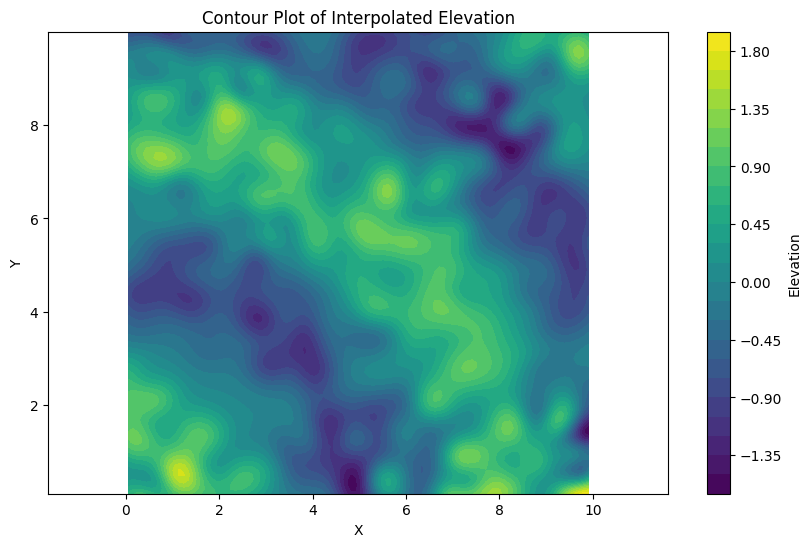

In [ ]:
# 模擬數據
np.random.seed(42)  # 保持隨機性一致
n_points = 300  # 數據點數量
x = np.random.uniform(0, 10, n_points)  # 隨機生成 x 坐標
y = np.random.uniform(0, 10, n_points)  # 隨機生成 y 坐標
z = np.sin(np.sqrt(x**2 + y**2)) + np.random.normal(0, 0.1, n_points)  # 高度數據 (模擬)

# 定義 RBF 插值器（這裡使用 phi(r) = e^(-r^2)）
rbf_interpolant = Rbf(x, y, z, function='gaussian')

# 在網格上進行插值
xc = np.linspace(min(x), max(x), 100)
yc = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(xc, yc) # 用於生成坐標網格的函數
Z = rbf_interpolant(X, Y)  # 計算插值值

# 繪製等高線圖
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, Z, levels=32, cmap='viridis')  # 等高線填充圖
plt.colorbar(contour, label="Elevation")  # 添加顏色條
plt.axis("equal")  # 保持比例
plt.title("Contour Plot of Interpolated Elevation")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

使用 rbf_interpolation，並且標註原始數據點

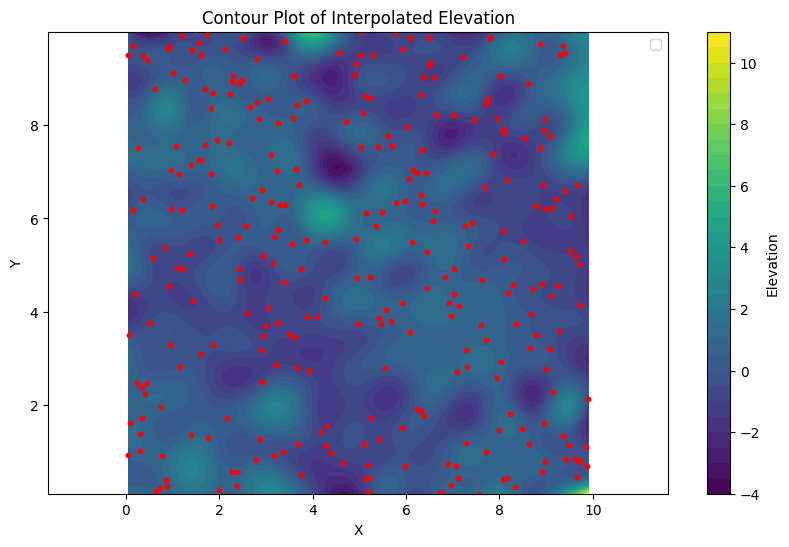

In [ ]:
# 模擬數據
np.random.seed(42)  # 保持隨機性一致
n_points = 300  # 數據點數量
x = np.random.uniform(0, 10, n_points)  # 隨機生成 x 坐標
y = np.random.uniform(0, 10, n_points)  # 隨機生成 y 坐標
z = np.sin(np.sqrt(x**2 + y**2)) + np.random.normal(0, 0.1, n_points)  # 高度數據 (模擬)

# 使用自定義 RBF 插值器
interpolant = rbf_interpolation(x, y, z, phi="gaussian")

# 在網格上進行插值
xc = np.linspace(min(x), max(x), 100)
yc = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(xc, yc)
Z = np.array([interpolant(xi, yi) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

# 繪製等高線圖
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, Z, levels=32, cmap='viridis')  # 等高線填充圖
plt.colorbar(contour, label="Elevation")  # 添加顏色條
plt.axis("equal")  # 保持比例
plt.title("Contour Plot of Interpolated Elevation")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x, y, c='red', s=10)  # 標記原始數據點
plt.legend()
plt.show()